## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.metrics import r2_score
import math
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [131]:
X = np.linspace(0, 20)

In [132]:
y = -1*X + 2

#### Plot your data points. 

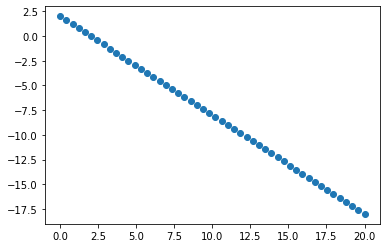

In [133]:
plt.scatter(X,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

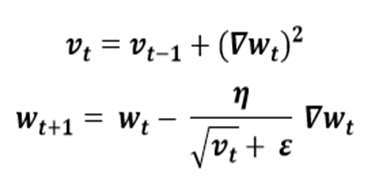

In [134]:
def hyp(X_in, theta_0_in, theta_1_in):
    h_x = []
    for i in range(len(X_in)):
        h_x.append(theta_0_in + theta_1_in *X_in[i])
    return h_x

def cost_fun(X_in, y_in, theta_0_in,  theta_1_in, h):
    res = sum((h - y_in)**2)
    res = res * (1/(2*len(X_in)))
    return res

def gradient(X_in, y_in, h_in):
    g_0 = (1/len(X_in)) * sum(h_in - y_in)
    g_1 = (1/len(X_in)) * sum((h_in - y_in) * X_in)
    return g_0, g_1

def update_param(t_0, t_1, alpha, v0, v1, eps, g_0, g_1):
    t_0 = t_0 - ((alpha / ((math.sqrt(v0)) + eps) ) * g_0)
    t_1 = t_1 - ((alpha / ((math.sqrt(v1)) + eps) ) * g_1)
    return t_0, t_1

def results(X_in, y_in, loss, hyper, theta0, theta1, opt1, opt2):
    print('r2 score:', r2_score(y, hyp(X_in, opt1, opt2)))
    print('loss-epochs:')
    plt.plot(list(range(len(los_arr))),los_arr)
    plt.show()
    print('loss-theta0:')
    plt.plot(t_0_arr, los_arr)
    plt.show()
    print('loss-theta1:')
    plt.plot(t_1_arr, los_arr)
    plt.show()
    print('all fitted lines per epoch:')
    for i in range(len(hyper_arr)): 
        plt.plot(X, hyper_arr[i])
    plt.show()   
    print('best fit line:')
    plt.scatter(X,y)
    plt.plot(X,hyper_arr[-1])
    plt.show()
    
    

In [135]:
def Adagrad(X_in, y_in, alpha, it_max, epsilon):
    theta_0, theta_1 = 0, 0
    v_0, v_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    
    for i in range(it_max):
        h = hyp(X_in, theta_0, theta_1)
        hyp_arr.append(h)
        
        grad_0, grad_1 = gradient(X_in, y_in, h)
        
        v_0 = v_0 + (grad_0**2)
        v_1 = v_1 + (grad_1**2)
        
        theta_0, theta_1 = update_param(theta_0, theta_1, alpha, v_0, v_1, epsilon, grad_0, grad_1)
        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        j = cost_fun(X_in, y_in, theta_0, theta_1, h)
        loss_arr.append(j)
        # stop condition: when cost is very small
        if i > 0 and abs(loss_arr[i-1] - loss_arr[i]) < 0.01:
            break
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1

In [136]:
alpha = 0.1
max_it = 10000
eps = 0.000000001
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = Adagrad(X, y, alpha, max_it, eps)   

r2 score: 0.9431899165932509
loss-epochs:


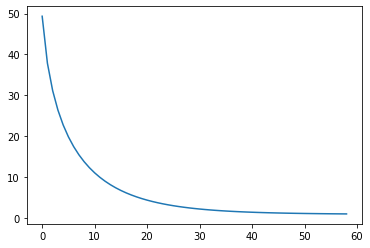

loss-theta0:


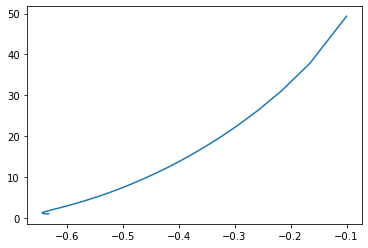

loss-theta1:


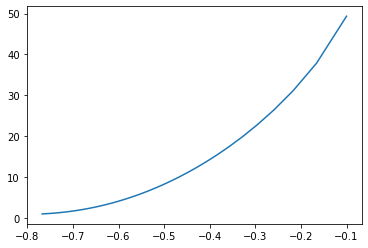

all fitted lines per epoch:


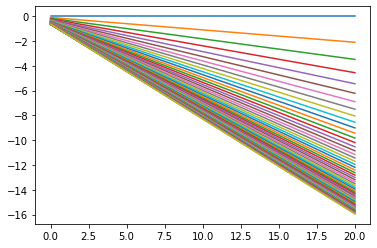

best fit line:


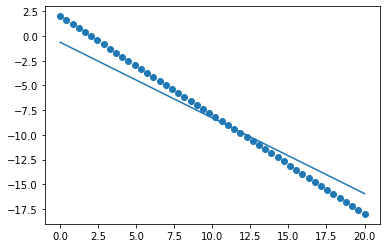

In [137]:
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)

### 2nd Adagrad trial (bad trial)

In [138]:
alpha = 0.01
max_it = 100000
eps = 0.000000001
# alpha = 0.01
# max_it = 10000
# eps = 0.000001
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = Adagrad(X, y, alpha, max_it, eps)   

r2 score: 0.5445906930606028
loss-epochs:


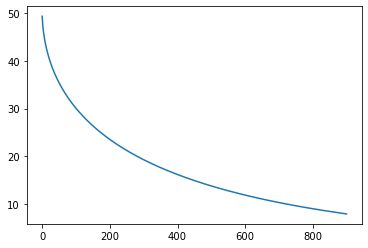

loss-theta0:


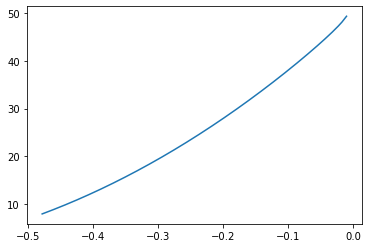

loss-theta1:


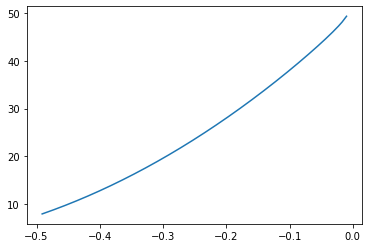

all fitted lines per epoch:


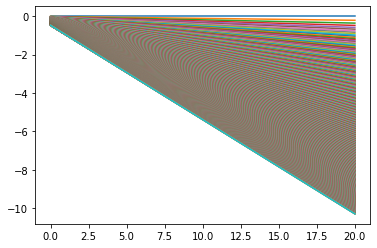

best fit line:


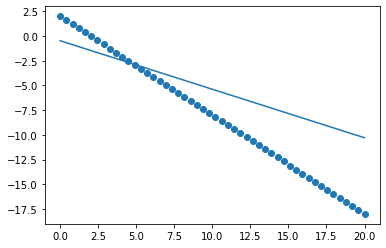

In [139]:
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

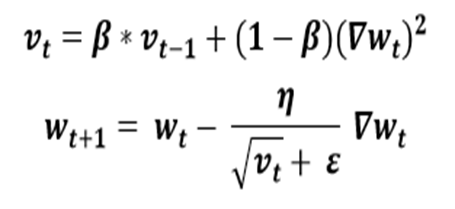

In [140]:
def RMS(X_in, y_in, alpha, it_max, epsilon, beta):
    theta_0, theta_1 = 0, 0
    v_0, v_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    
    for i in range(it_max):
        h = hyp(X_in, theta_0, theta_1)
        hyp_arr.append(h)
        
        grad_0, grad_1 = gradient(X_in, y_in, h)
        
        v_0 = (beta * v_0) + (1 - beta) * (grad_0**2)
        v_1 = (beta * v_1) + (1 - beta) * (grad_1**2)
        
        theta_0, theta_1 = update_param(theta_0, theta_1, alpha, v_0, v_1, epsilon, grad_0, grad_1)
        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        j = cost_fun(X_in, y_in, theta_0, theta_1, h)
        loss_arr.append(j)
        # stop condition: when cost is very small
        if i > 0 and abs(loss_arr[i-1] - loss_arr[i]) < 0.01:
            break
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1

In [141]:
alpha = 0.01
max_it = 1000
eps = 0.000001
b = 0.99 # beta
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = RMS(X, y, alpha, max_it, eps, b)

r2 score: 0.9451309691989064
loss-epochs:


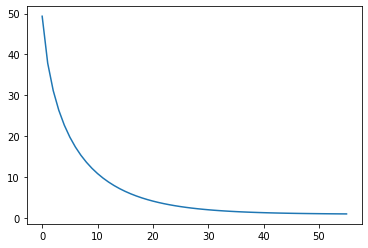

loss-theta0:


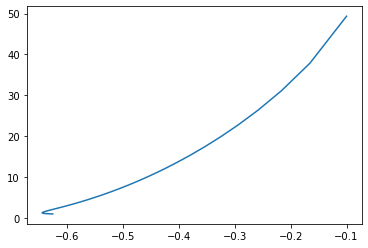

loss-theta1:


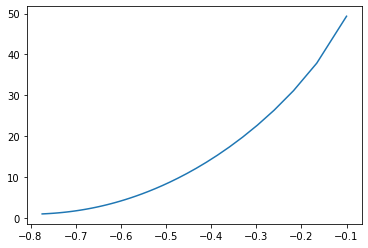

all fitted lines per epoch:


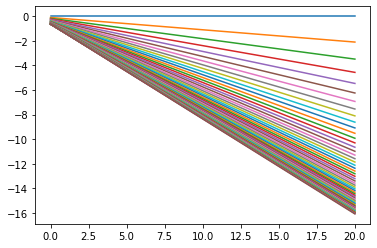

best fit line:


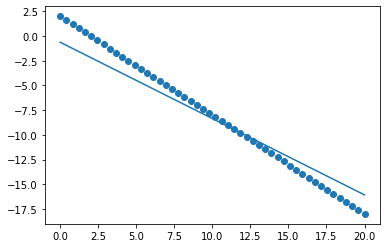

In [142]:
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)

### 2nd RMSProp trial

In [151]:
alpha = 0.1
max_it = 10000
eps = 0.000001
b = 0.9 # beta
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = RMS(X, y, alpha, max_it, eps, b)

r2 score: 0.9964158590638508
loss-epochs:


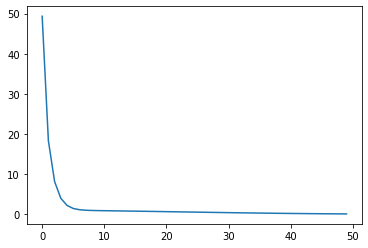

loss-theta0:


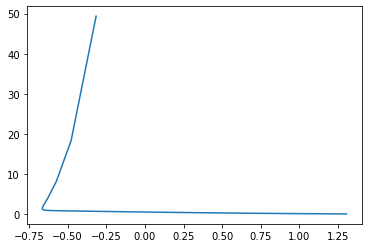

loss-theta1:


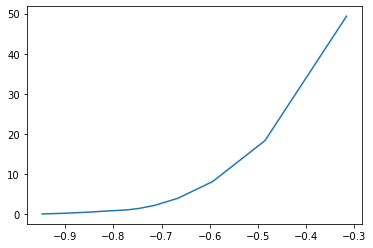

all fitted lines per epoch:


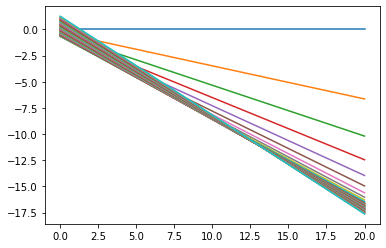

best fit line:


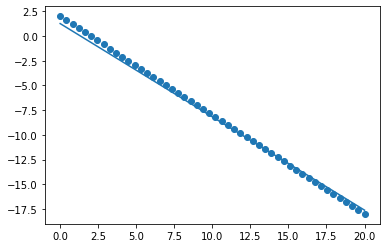

In [152]:
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

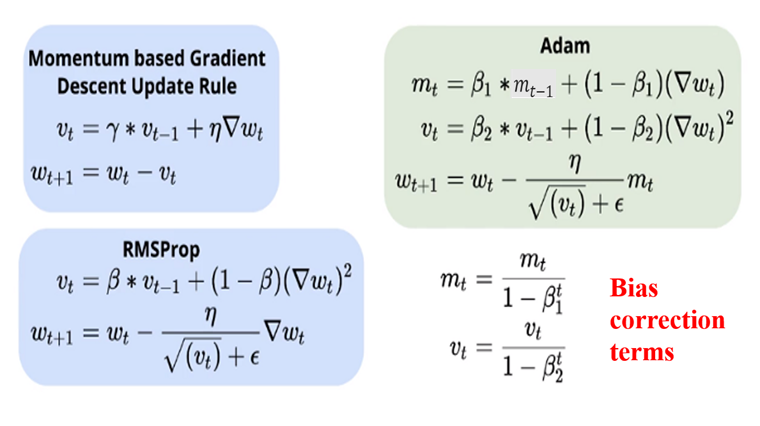

In [154]:
def update_param_adam(t_0, t_1, alpha, v0, v1, eps, m0, m1):
    t_0 = t_0 - ((alpha / ((math.sqrt(v0)) + eps) ) * m0)
    t_1 = t_1 - ((alpha / ((math.sqrt(v1)) + eps) ) * m1)
    return t_0, t_1

In [155]:
def Adam(X_in, y_in, alpha, it_max, epsilon, beta1, beta2):
    theta_0, theta_1 = 0, 0
    v_0, v_1 = 0, 0
    theta_0_arr = []
    theta_1_arr = []
    loss_arr = []
    hyp_arr = []
    m_0, m_1 = 0, 0
    
    for i in range(it_max):
        h = hyp(X_in, theta_0, theta_1)
        hyp_arr.append(h)
        
        grad_0, grad_1 = gradient(X_in, y_in, h)
        
        m_0 = beta1 * m_0 + (1 - beta1) * grad_0
        m_1 = beta1 * m_1 + (1 - beta1) * grad_1
        m_temp_0 = m_0 / (1 - beta1**(i+1))
        m_temp_1 = m_1 / (1 - beta1**(i+1))
        
        v_0 = (beta2 * v_0) + (1 - beta2) * (grad_0**2)
        v_1 = (beta2 * v_1) + (1 - beta2) * (grad_1**2)
        v_temp_0 = v_0 / (1 - beta2**(i+1))
        v_temp_1 = v_1 / (1 - beta2**(i+1))
        
        theta_0, theta_1 = update_param(theta_0, theta_1, alpha, v_temp_0, v_temp_1, epsilon, m_temp_0, m_temp_1)
        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        j = cost_fun(X_in, y_in, theta_0, theta_1, h)
        loss_arr.append(j)
        # stop condition: when cost is very small
        if i > 0 and abs(loss_arr[i-1] - loss_arr[i]) < 0.01:
            break
        
    opt_theta_0, opt_theta_1 = theta_0, theta_1
    
    return theta_0_arr, theta_1_arr, loss_arr, hyp_arr, opt_theta_0, opt_theta_1

In [162]:
alpha = 0.001
max_it = 10000
eps = 0.000000001
b1 = 0.9
b2 = 0.999
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = Adam(X, y, alpha, max_it, eps, b1, b2)   

r2 score: 0.8266455674353761
loss-epochs:


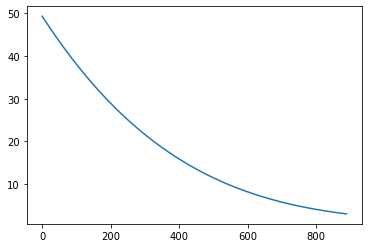

loss-theta0:


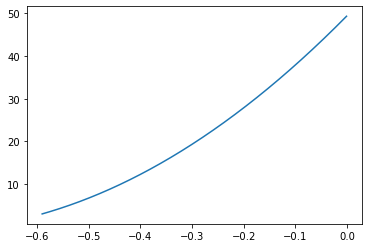

loss-theta1:


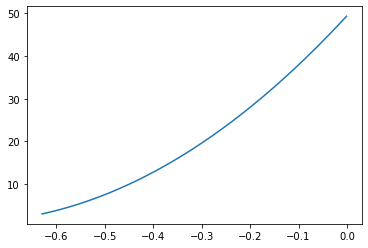

all fitted lines per epoch:


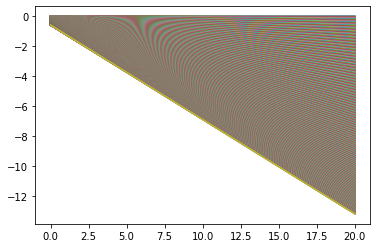

best fit line:


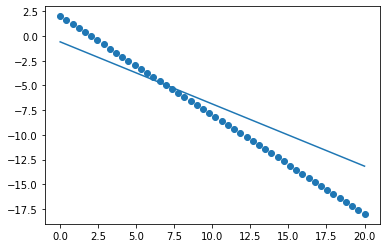

In [163]:
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)

### 2nd Adam trail

In [166]:
alpha = 0.1
max_it = 10000
eps = 0.000001
b1 = 0.9
b2 = 0.999
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = Adam(X, y, alpha, max_it, eps, b1, b2)   

r2 score: 0.963640855316271
loss-epochs:


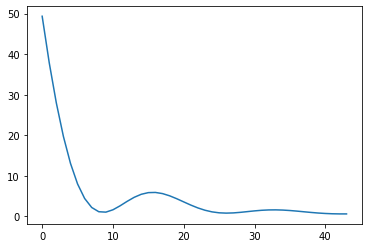

loss-theta0:


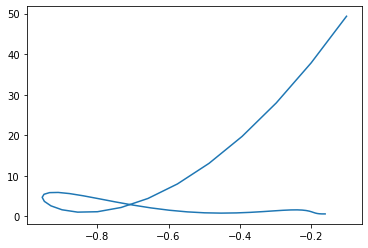

loss-theta1:


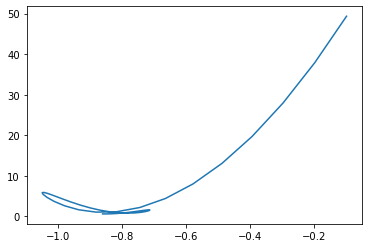

all fitted lines per epoch:


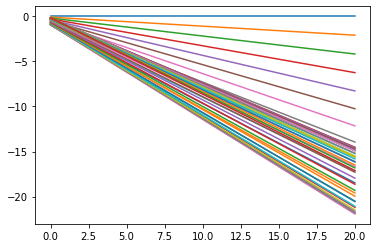

best fit line:


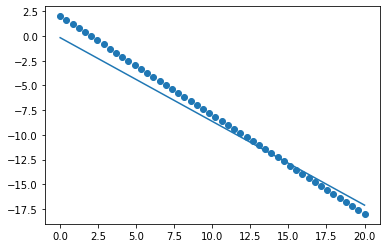

In [167]:
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)

## comparison between 3 algorithms

In [178]:
alpha = 0.1
max_it = 10000
eps = 0.000000001
b1 = 0.9
b2 = 0.999


### Adagrad

r2 score: 0.9431899165932509
loss-epochs:


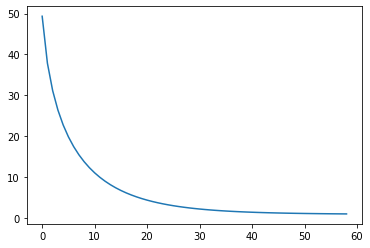

loss-theta0:


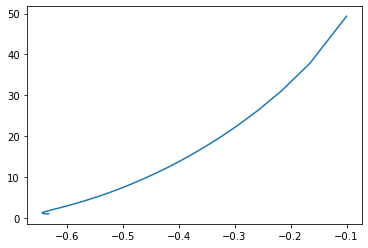

loss-theta1:


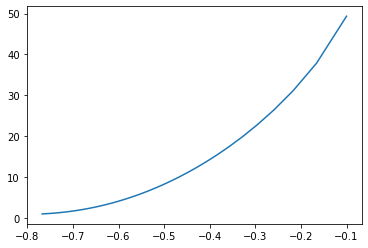

all fitted lines per epoch:


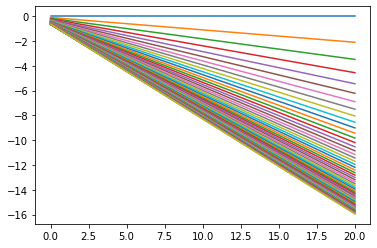

best fit line:


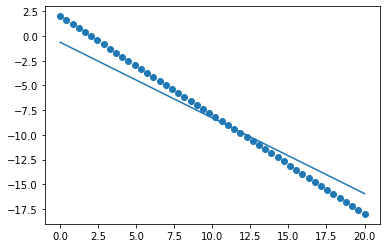

In [175]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = Adagrad(X, y, alpha, max_it, eps)
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)

### RMSProp

r2 score: 0.9904820596691938
loss-epochs:


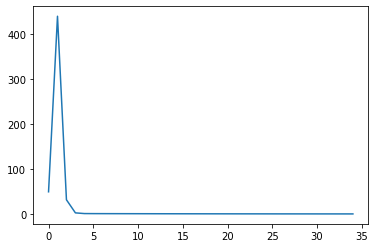

loss-theta0:


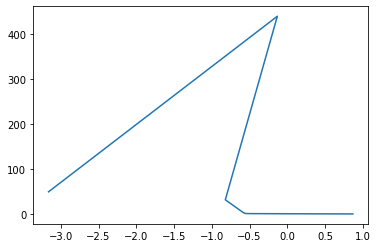

loss-theta1:


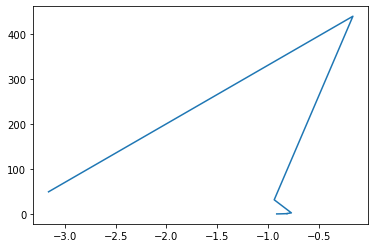

all fitted lines per epoch:


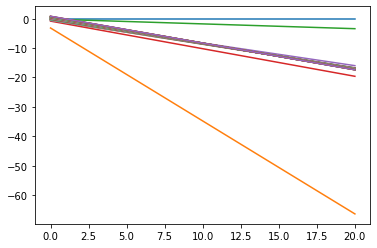

best fit line:


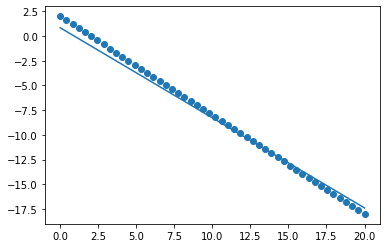

In [177]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = RMS(X, y, alpha, max_it, eps, b2)
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)


### Adam

r2 score: 0.9636408557531474
loss-epochs:


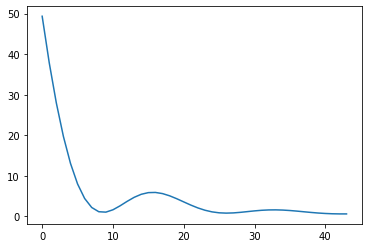

loss-theta0:


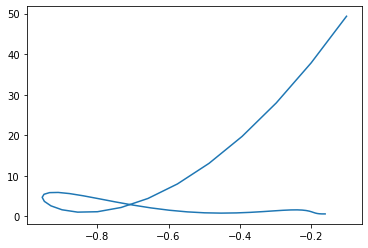

loss-theta1:


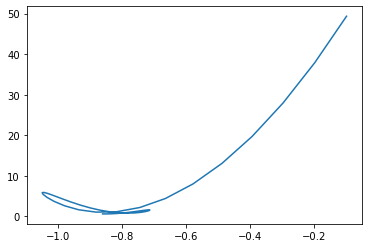

all fitted lines per epoch:


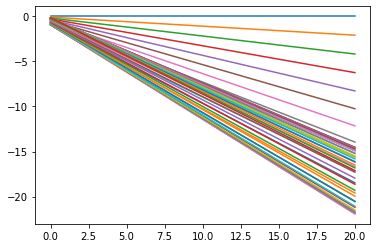

best fit line:


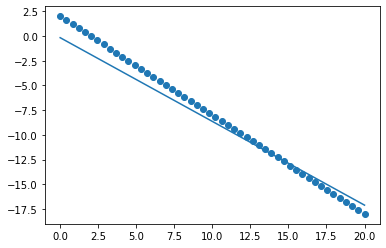

In [179]:
t_0_arr, t_1_arr, los_arr, hyper_arr, opt_t_0, opt_t_1 = Adam(X, y, alpha, max_it, eps, b1, b2)   
results(X, y, los_arr, hyper_arr, t_0_arr, t_1_arr, opt_t_0, opt_t_1)


## Congratulations 
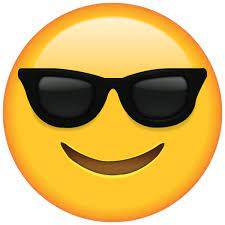

### Thank you 😊